# Table of Contents

* [Section 1](#Section-one)
     * [Section (1.a)](#subsection-one-of-section-1)
     * [Section (1.b)](#subsection-two-of-section-1)
* [Section 2](#Section-two)
     * [Section (2.a)](#subsection-one-of-section-2)
```

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

from fastai.text.all import *
import torch

from pathlib import Path 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv


In [3]:
#import zipfile,kaggle
# if iskaggle:
path = Path('../input/ecommerce-text-classification')
! pip install -q datasets

# 1) Import Data

In [4]:
column_headers = ['target','item_description']
df = pd.read_csv(path/'ecommerceDataset.csv', names=column_headers)
print(df.shape)
df.head()

(50425, 2)


target  \
0  Household   
1  Household   
2  Household   
3  Household   
4  Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          item_description  
0  Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing te...  
1                                                                                                                                                                                                                                                               SAF 'Floral' Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297) Painting made up in synthetic frame with UV textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch (A perfect gift for your special ones).  
2  SAF 'UV Textured Modern Art Print Framed' Painting (Synthetic, 35 cm x 50 cm x 3 cm, Set of 3) Color:Multicolor                                                                                 |                            Size:35 cm x 50 cm x 3 cm   Overview a beautiful painting involves the action or skill of using paint in the right manner; hence, the end product will be a picture that can speak a thousand words they say. Arts have been in trend for quite some time now. It can give different viewer different meanings style and design the SAF wood matte abstract painting with frame is quit...  
3  SAF Flower Print Framed Painting (Synthetic, 13.5 inch x 22 inch, UV Textured, Set of 3, SANFSW4951) Color:Multicolor                                                                                 |                            Size:35 cm x 50 cm x 2 cm   A beautiful painting involves the action or skill of using paint in the right manner, hence, the end product will be a picture that can speak a thousand words they say. Arts have been in trend for quite some time now. It can give different viewer different meanings style and design the saf wood matte painting with frame is quite abstract a...  
4  Incredible Gifts India Wooden Happy Birthday Unique Personalized Gift (5 X 4 Inch) Size:4 x 5   Made Of Natural Imported Wood, Which Is Quite Solid With Light Particle Pattern & Is Soft Pale To Blond Colour. Your Uploaded Photo Will Look Amazing And Beautiful After Laser Engraving On It. This Is One Of The Most Popular Unique Gifts In Our Store. We Offer This In Multiple Sizes, Some Can Be Used As Table Top And The Big Sizes Can Be Used As Wall Hanging Which Just Blends With Your Home Decaration. You Just Need To Upload A Picture And Add Your Own Text And We Will Do The Rest For You. We Wi...

In [5]:
df.describe()

target  \
count       50425   
unique          4   
top     Household   
freq        19313   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               item_description  
count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     50424  
unique                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    27802  
top     Think & Grow Rich About the Author NAPOLEON HILL, born in Pound, Southwest Virginia in 1883, was a very successful American author in the area of the new thought movement—one of the earliest producers of the modern genre of personal-success literature. He is widely considered to be one of the great writers on success. The turning point in Hill’s life occurred in the year 1908 when he interviewed the industrialist Andrew Carnegie—one of the most powerful men in the world at that time, as part of an assignment—an interview which ultimately led to the publication of Think and Grow Rich, one o...  
freq                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         30

# 2) Preprocessing

In [6]:
# Show nulls
print(df.isna().sum())

null_rows = df[df.isnull().any(axis=1)]
null_rows

target              0
item_description    1
dtype: int64


target item_description
39330  Clothing & Accessories              NaN

In [7]:
# drop 1 null row
df = df.dropna()

### NLP Text Classification - From remote ws notebook 'test_classification'

In [8]:
# Rename column
df = df.rename(columns={'target': 'labels'})

# Reorder cols
col_order = ['item_description', 'labels']
df = df[col_order]
df.head()

item_description  \
0  Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing te...   
1                                                                                                                                                                                                                                                               SAF 'Floral' Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297) Painting made up in synthetic frame with UV textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch (A perfect gift for your special ones).   
2  SAF 'UV Textured Modern Art Print Framed' Painting (Synthetic, 35 cm x 50 cm x 3 cm, Set of 3) Color:Multicolor                                                                                 |                            Size:35 cm x 50 cm x 3 cm   Overview a beautiful painting involves the action or skill of using paint in the right manner; hence, the end product will be a picture that can speak a thousand words they say. Arts have been in trend for quite some time now. It can give different viewer different meanings style and design the SAF wood matte abstract painting with frame is quit...   
3  SAF Flower Print Framed Painting (Synthetic, 13.5 inch x 22 inch, UV Textured, Set of 3, SANFSW4951) Color:Multicolor                                                                                 |                            Size:35 cm x 50 cm x 2 cm   A beautiful painting involves the action or skill of using paint in the right manner, hence, the end product will be a picture that can speak a thousand words they say. Arts have been in trend for quite some time now. It can give different viewer different meanings style and design the saf wood matte painting with frame is quite abstract a...   
4  Incredible Gifts India Wooden Happy Birthday Unique Personalized Gift (5 X 4 Inch) Size:4 x 5   Made Of Natural Imported Wood, Which Is Quite Solid With Light Particle Pattern & Is Soft Pale To Blond Colour. Your Uploaded Photo Will Look Amazing And Beautiful After Laser Engraving On It. This Is One Of The Most Popular Unique Gifts In Our Store. We Offer This In Multiple Sizes, Some Can Be Used As Table Top And The Big Sizes Can Be Used As Wall Hanging Which Just Blends With Your Home Decaration. You Just Need To Upload A Picture And Add Your Own Text And We Will Do The Rest For You. We Wi...   

      labels  
0  Household  
1  Household  
2  Household  
3  Household  
4  Household

In [9]:
df.labels.unique()

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)

In [10]:
"""
    Break down each label
        - Electronics into gaming vs. computer vs. hardware
        - Household into garden vs. kitchen vs. living room
        - Books into author vs. genre
        - Clothing & Accessories into shoes vs. belts vs. shirts
"""

electronics_df = df[df['labels'] == 'Electronics']
print(electronics_df.shape)
electronics_df.head()

(10621, 2)


item_description  \
39804                                                            Dell 19.5V-3.34AMP 65W Laptop Adapter (Without power Cord) Design Features of Dell Laptop - Power adapter - 65 Watt (No Power Cable) The Dell 65-Watt Inspiron AC Power Adapter helps you to charge Dell laptops, with screen size ranging from 13-inches to 17-inches. The Inspiron power adapter provides you with continuous power supply. The adapter is lightweight for ease of use. The 3-pronged plug design of the Dell Inspiron laptop adapter prevents voltage drop. You can easily plug it into any wall outlet to deliver AC power to your laptop   
39805                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Bluetooth Dongle USB CSR 4.0 Adapter Receiver Transfer Wireless Adapter for PC Computer Laptop Supports Windows 10 8.1 8 7 Vista XP - Upgraded Version   
39806  Wi-Fi Receiver 300Mbps, 2.4GHz, 802.11b/g/n USB 2.0 Wireless Mini Wi-Fi Network Adapter Mini portable USB 2. 0 design. This 300mbps portable mini wireless USB adapter allows you to connect PC to a wireless network and access high-speed internet connection. It's perfect for internet surfing and on-line gaming. Wireless n speed up to 300mbps, perfect for internet surfing and on-line gaming. Complies with IEEE 802. 11n (Draft 2. 0), IEEE 802. 11g, IEEE 802. 11b standards. Provides two work modes: infrastructure and ad-hoc. Mimo technology makes wireless transmission rates up to 300mbps. Cca t...   
39807  SanDisk 64GB Class 10 microSDXC Memory Card with Adapter (SDSQUAR-064G-GN6MA) Size name:64 GB   Capacity: 64GB;SanDisk Ultra microSDXC and microSDHC cards are fast for better pictures, app performance, and Full HD video.1 Ideal for Android smartphones and tablets, these A1-rated cards load apps faster for a better smartphone experience.3 With up to 256GB* capacity, you have the capacity to take more pictures and Full HD video and capture life at its fullest. Built to perform in harsh conditions, SanDisk Ultra microSD cards are waterproof, temperature proof, shockproof, and X-ray proof.2 Th...   
39808  Gizga Essentials Laptop Power Cable Cord- 3 Pin Adapter Isi Certified(1 Meter/3.3 Feet) This polarized power cable designed to connect a wall socket and your laptop/notebook power brick. The female connector plugs directly into the device while the male connector plugs into a standard outlet. It ensures overload protection, thanks to its advanced wires. It has an anti-interference feature with better isolation materials and rubberized texture cord. It features ISI marked 100% copper inside-cable. It is compatible with HP, Dell, Lenovo, Sony Vaio, Toshiba, Wipro, LG, ASUS, Samsung, IBM, Ace...   

            labels  
39804  Electronics  
39805  Electronics  
39806  Electronics  
39807  Electronics  
39808  Electronics

# 3) EDA

In [11]:
label_counts = df.labels.value_counts()
label_counts

labels
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: count, dtype: int64

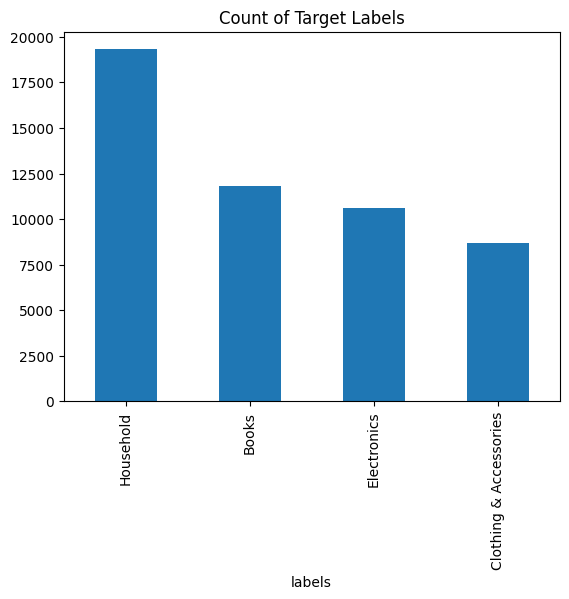

In [12]:
label_counts.plot(kind='bar')
plt.title('Count of Target Labels')
plt.show()

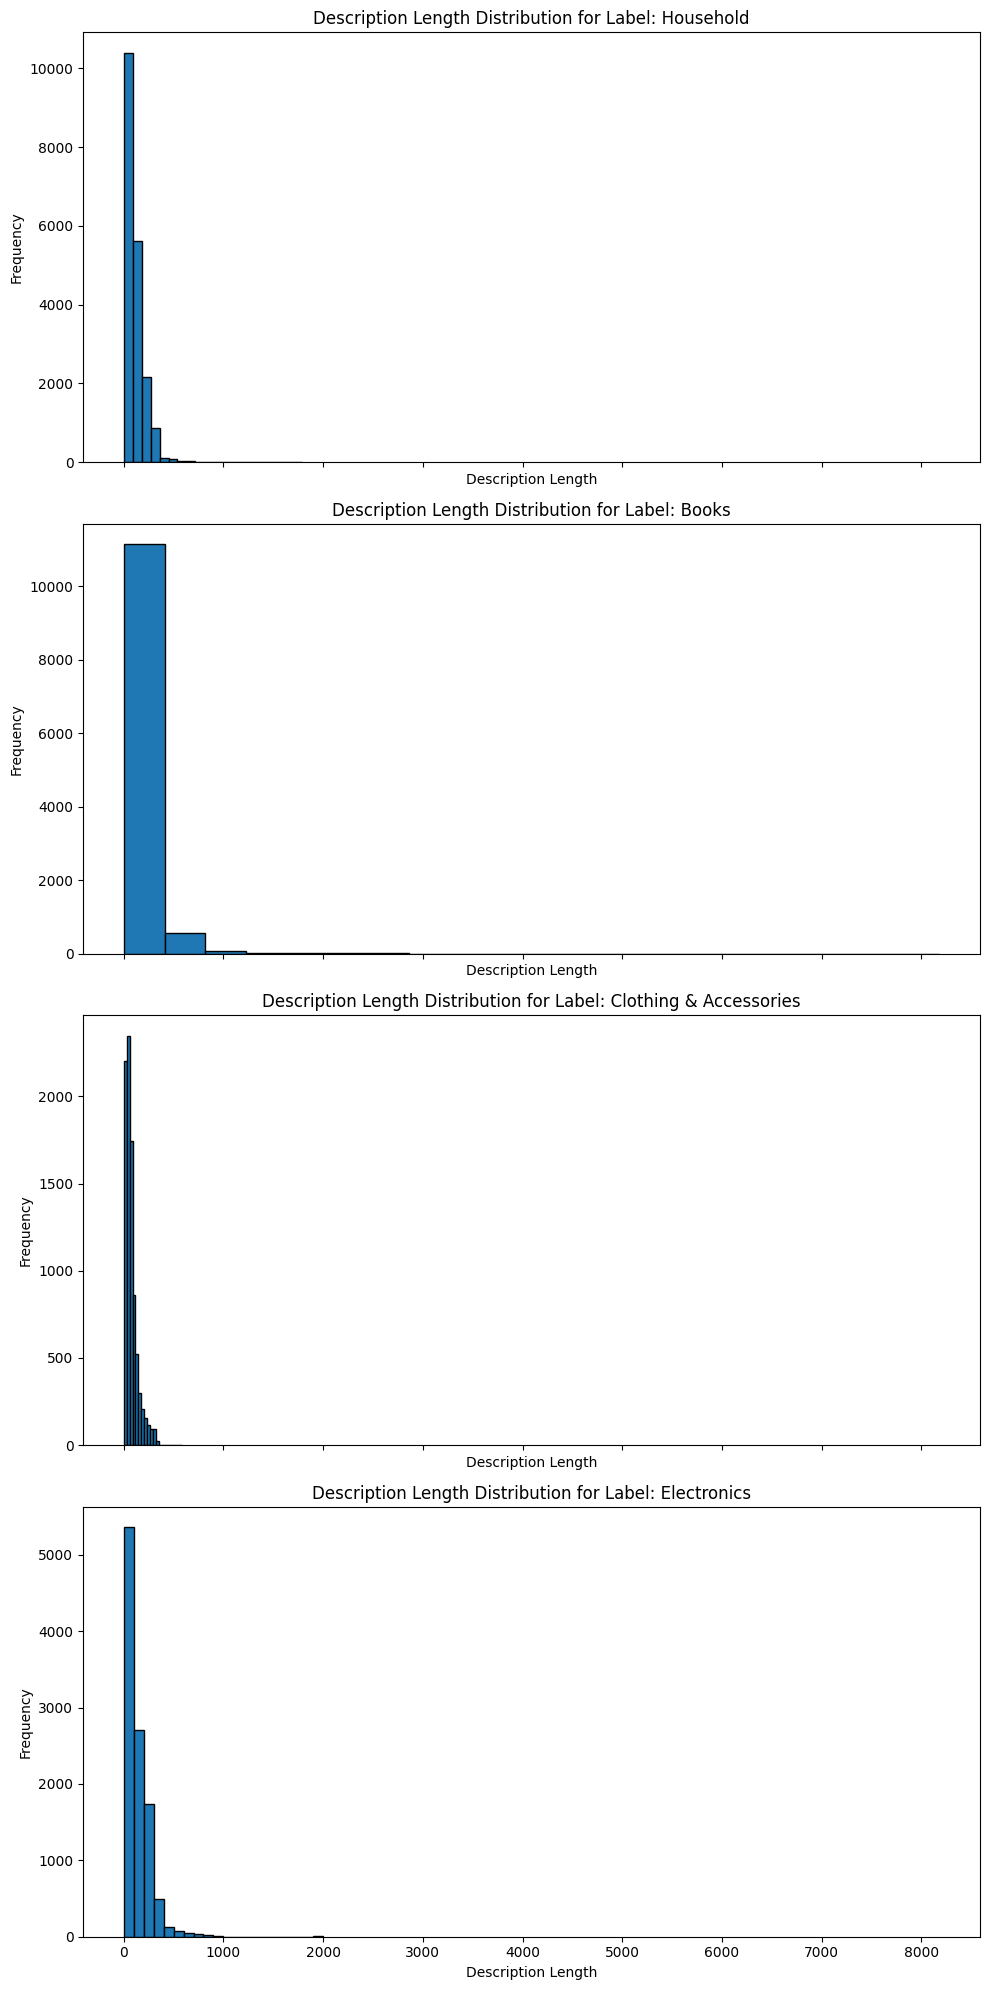

In [13]:
# Calculate the length of item_description for each row
df['description_length'] = df['item_description'].apply(lambda x: len(str(x).split()))

# Get the unique labels
labels = df['labels'].unique()

# Set up the figure and subplots
fig, axes = plt.subplots(len(labels), 1, figsize=(10, 5*len(labels)), sharex=True)

# Iterate over each label and plot the histogram
for i, label in enumerate(labels):
    # Filter the DataFrame for the current label
    label_df = df[df['labels'] == label]
    
    # Plot the histogram of description lengths
    axes[i].hist(label_df['description_length'], bins=20, edgecolor='black')
    axes[i].set_title(f'Description Length Distribution for Label: {label}')
    axes[i].set_xlabel('Description Length')
    axes[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Outliers clearly present, let's identify and remove those

In [14]:
df.description_length.describe()

count    50424.000000
mean       114.184297
std        157.806972
min          1.000000
25%         34.000000
50%         78.000000
75%        152.000000
max       8181.000000
Name: description_length, dtype: float64

In [15]:
grouped_stats = df.groupby('labels')['description_length'].describe()
grouped_stats

count        mean         std  min   25%   50%  \
labels                                                                     
Books                   11820.0  135.613198  265.430322  1.0  13.0  78.0   
Clothing & Accessories   8670.0   72.372664   63.721351  1.0  29.0  56.0   
Electronics             10621.0  134.540062  129.034090  1.0  43.0  99.0   
Household               19313.0  108.644954   97.980916  1.0  44.0  83.0   

                          75%     max  
labels                                 
Books                   169.0  8181.0  
Clothing & Accessories   92.0   581.0  
Electronics             194.0  1997.0  
Household               146.0  1791.0

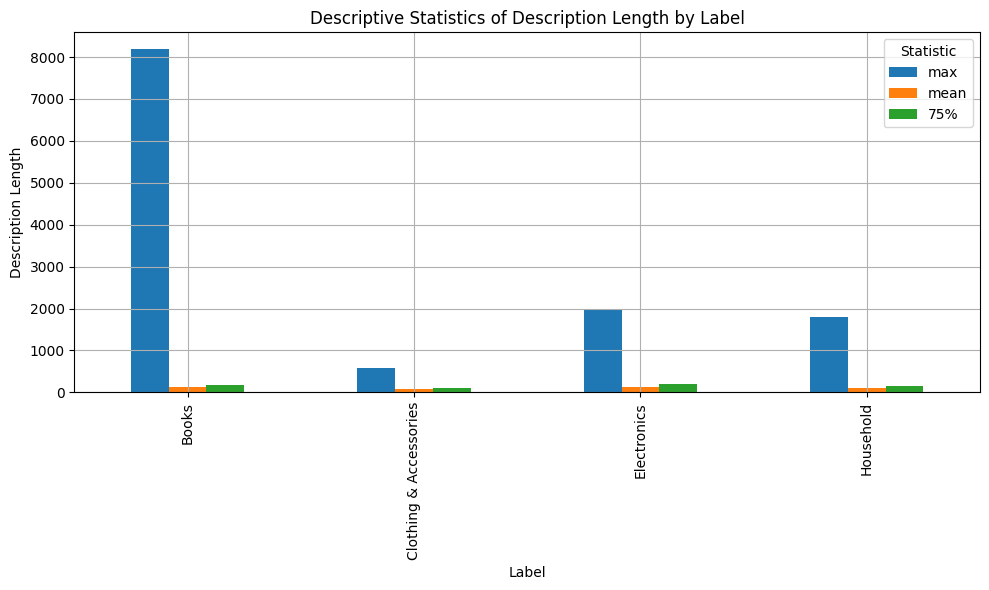

In [16]:
grouped_stats = df.groupby('labels')['description_length'].describe()

# Plotting the statistics for each label
fig, ax = plt.subplots(figsize=(10, 6))
grouped_stats.loc[:, ['max', 'mean', '75%']].plot(kind='bar', ax=ax)

# Customizing the plot
ax.set_xlabel('Label')
ax.set_ylabel('Description Length')
ax.set_title('Descriptive Statistics of Description Length by Label')
ax.legend(title='Statistic')
ax.grid(True)

plt.tight_layout()
plt.show()

There are some high outliers
* 75% of the total data (not broken out by labels) has a mean 'description_length' of 152 characters
* In Books, max is 8k+ characters, but 75% of the 'description_length' is 169 characters long. 
* Remove all outliers to get more realistic view of the data 

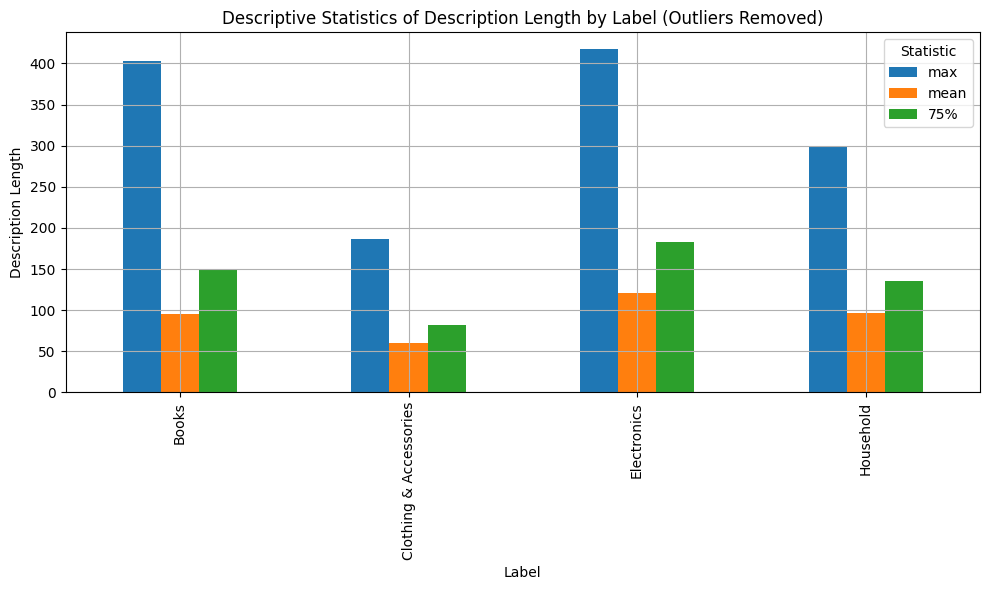

In [17]:
"""
    Remove outliers
        - IQR method
        - Z-Score
            - calculates the mean and std, and removes based on threshold
        - Percentile
        - Median Absolute Deviation
        - Isolation Forest
            - identifies anomalies or outliers by randomly selecting a feature and a split value to isolate data points recursively until each point is isolated. 
            
"""

# Assuming your DataFrame is named 'df' and has columns 'label' and 'description_length'
def remove_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group >= lower_bound) & (group <= upper_bound)]

df_cleaned = df.groupby('labels')['description_length'].apply(remove_outliers).reset_index()

# Plotting the statistics for each label after removing outliers
grouped_stats = df_cleaned.groupby('labels')['description_length'].describe()

fig, ax = plt.subplots(figsize=(10, 6))
grouped_stats.loc[:, ['max', 'mean', '75%']].plot(kind='bar', ax=ax)

# Customizing the plot
ax.set_xlabel('Label')
ax.set_ylabel('Description Length')
ax.set_title('Descriptive Statistics of Description Length by Label (Outliers Removed)')
ax.legend(title='Statistic')
ax.grid(True)

plt.tight_layout()
plt.show()

* Electronics has the longest item_descriptions. We know this when looking on Amazon and you'll notice sellers using long descriptions in tech to maximize SEO.
* Books has 2nd highest item_descriptions
* Then Household
* Lastly Clothing & Accessories

<a id="Section-one" ></a>
## Word Clouds

To analyze most frequently used words per class label

In [20]:
df_cleaned.head()

labels  level_1  description_length
0  Books    19313                 167
1  Books    19314                   6
2  Books    19315                 129
3  Books    19316                 362
4  Books    19317                  85

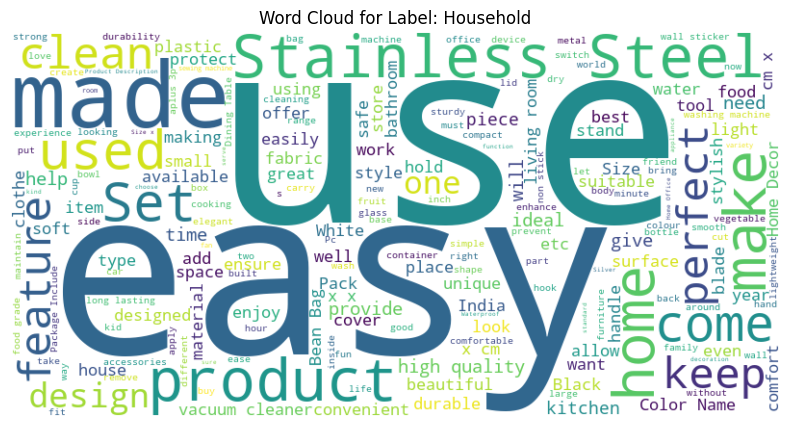

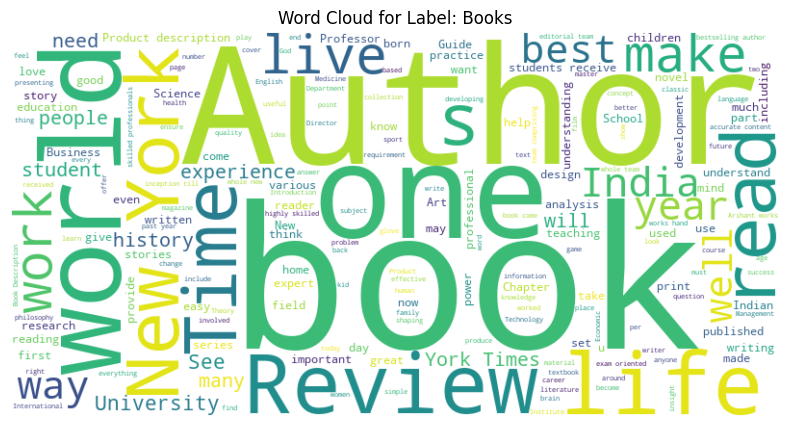

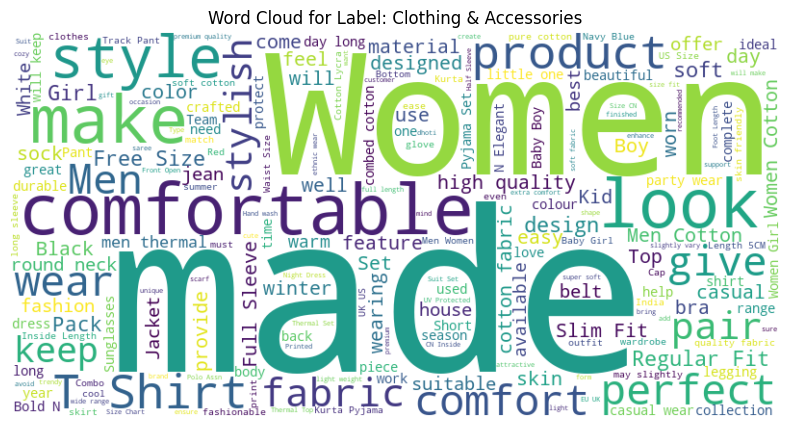

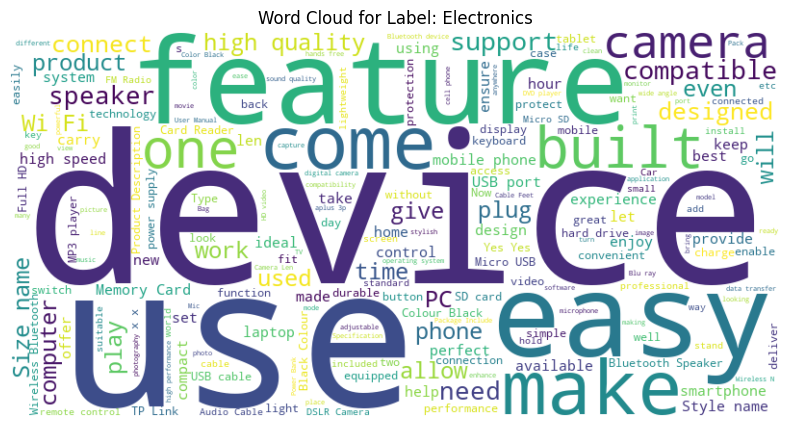

In [21]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the unique labels
labels = df['labels'].unique()

# Create word clouds for each label
for label in labels:
    # Filter the dataset for the current label
    label_df = df[df['labels'] == label]
    
    # Combine all the text for the current label
    text = ' '.join(label_df['item_description'])
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label: {label}')
    plt.show()

In [17]:
"""
    Create a vocab of unique words and analyze size and frequency distribution of words
        - plot frequency graph (log-log plot) to examine distribution 
"""



'\n    Create a vocab of unique words and analyze size and frequency distribution of words\n        - plot frequency graph (log-log plot) to examine distribution \n'

In [23]:
"""
    Sentiment Analysis
        - visualize with histogram or pie chart
"""

from nltk.sentiment import SentimentIntensityAnalyzer

# Assuming your DataFrame is named 'df' and has columns 'label' and 'item_description'
# Download the required NLTK data (you only need to run this once)
import nltk
#nltk.download('vader_lexicon')

# Create an instance of the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores for each item description
def get_sentiment_scores(description):
    sentiment_scores = sia.polarity_scores(description)
    return sentiment_scores['compound']

# Apply the sentiment analysis function to each item description
df['sentiment_score'] = df['item_description'].apply(get_sentiment_scores)

# Group the data by label and calculate the mean sentiment score for each label
sentiment_by_label = df.groupby('labels')['sentiment_score'].mean()

print("Sentiment Analysis Results:")
print(sentiment_by_label)

Sentiment Analysis Results:
labels
Books                     0.490274
Clothing & Accessories    0.664459
Electronics               0.618782
Household                 0.665245
Name: sentiment_score, dtype: float64


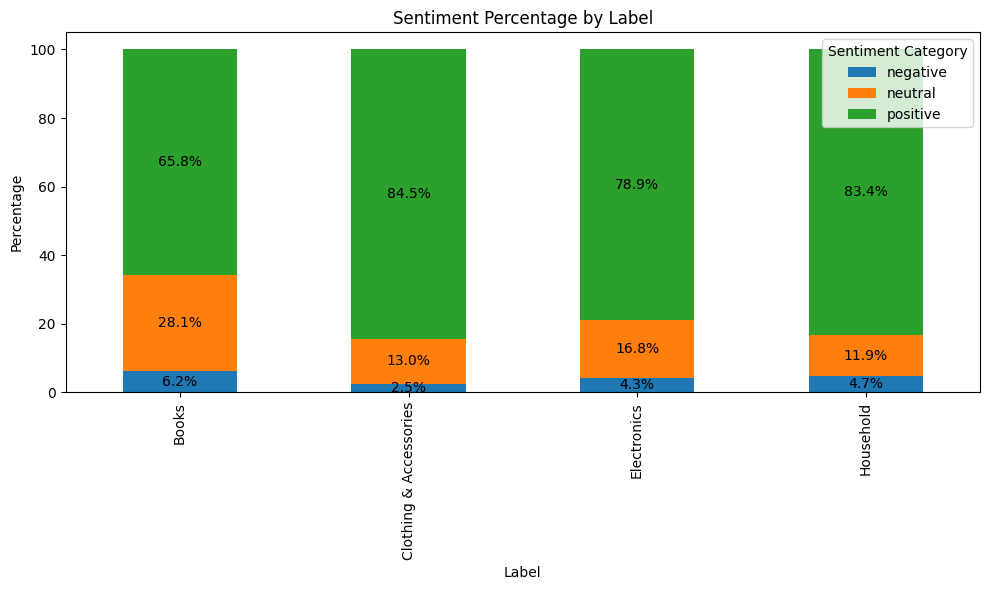

In [26]:
negative_threshold = -0.05
positive_threshold = 0.05

def categorize_sentiment(score):
    if score < negative_threshold:
        return 'negative'
    elif score > positive_threshold:
        return 'positive'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

sentiment_percentage = df.groupby(['labels', 'sentiment_category']).size().unstack(fill_value=0)
sentiment_percentage = sentiment_percentage.apply(lambda x: x / x.sum() * 100, axis=1)

# Create a stacked bar plot
ax = sentiment_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
ax.set_xlabel('Label')
ax.set_ylabel('Percentage')
ax.set_title('Sentiment Percentage by Label')
ax.legend(title='Sentiment Category')

# Add percentage labels to each bar
for i in range(len(sentiment_percentage)):
    bar_bottom = 0
    for j in range(len(sentiment_percentage.columns)):
        bar_height = sentiment_percentage.iloc[i, j]
        if bar_height > 0:
            ax.text(i, bar_bottom + bar_height / 2, f'{bar_height:.1f}%', ha='center', va='center')
        bar_bottom += bar_height

plt.tight_layout()
plt.show()

In [29]:
"""
    Topic Modeling
        - Latent Dirichlet Allocation (LDA) or Non-negative Matrix Factorization (NMF):
                - to discover latent topics in the text data
"""

from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Assuming your DataFrame is named 'df' and has columns 'label' and 'item_description'

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase and tokenize
    tokens = simple_preprocess(text, deacc=True)
    # Remove stopwords
    tokens = [token for token in tokens if token not in STOPWORDS]
    return tokens

# Apply preprocessing to item_description
df['processed_description'] = df['item_description'].apply(preprocess_text)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df['processed_description'])
corpus = [dictionary.doc2bow(text) for text in df['processed_description']]

# Train the LDA model
num_topics = 5  # Specify the number of topics you want to discover
lda_model = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print the topics and their top words
print("Topics:")
for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(f"Topic {idx+1}: {topic}")

# Perform topic modeling for each category
for label in df['labels'].unique():
    print(f"\nTopic Modeling for Label: {label}")
    label_df = df[df['labels'] == label]
    label_corpus = [dictionary.doc2bow(text) for text in label_df['processed_description']]
    label_lda_model = models.LdaMulticore(corpus=label_corpus, id2word=dictionary, num_topics=num_topics)
    
    print("Topics:")
    for idx, topic in label_lda_model.print_topics(num_topics=num_topics, num_words=10):
        print(f"Topic {idx+1}: {topic}")

Topics:
Topic 1: 0.007*"set" + 0.005*"book" + 0.005*"home" + 0.005*"wall" + 0.005*"black" + 0.004*"size" + 0.004*"look" + 0.004*"women" + 0.004*"quality" + 0.004*"table"
Topic 2: 0.006*"power" + 0.005*"use" + 0.005*"device" + 0.005*"black" + 0.005*"easy" + 0.005*"phone" + 0.005*"product" + 0.004*"design" + 0.004*"high" + 0.004*"car"
Topic 3: 0.011*"book" + 0.007*"author" + 0.004*"new" + 0.004*"life" + 0.004*"time" + 0.004*"review" + 0.003*"books" + 0.003*"women" + 0.003*"best" + 0.003*"times"
Topic 4: 0.008*"usb" + 0.007*"bluetooth" + 0.006*"audio" + 0.006*"speaker" + 0.006*"black" + 0.006*"high" + 0.005*"sound" + 0.005*"mm" + 0.005*"size" + 0.005*"power"
Topic 5: 0.008*"cotton" + 0.008*"men" + 0.005*"women" + 0.005*"set" + 0.005*"author" + 0.004*"size" + 0.004*"india" + 0.004*"quality" + 0.004*"wear" + 0.004*"world"

Topic Modeling for Label: Household
Topics:
Topic 1: 0.010*"set" + 0.008*"use" + 0.007*"mm" + 0.006*"quality" + 0.006*"steel" + 0.006*"easy" + 0.006*"tool" + 0.005*"plast

In [20]:
"""
    Named Entity Recognition (NER)
        - identify named entities (people, organizations, locations) 
        - analyze frequency and distribution across different labels
        - visualize using word clouds
"""

'\n    Named Entity Recognition (NER)\n        - identify named entities (people, organizations, locations) \n        - analyze frequency and distribution across different labels\n        - visualize using word clouds\n'

In [21]:
# TextBlock is passed to DataBlock
## TextBlock handles tokenization and numericalization automatically

#dblock = partial(get_text_files, folders=['train', 'test', 'unsup'])

# dblock = DataBlock(
#     blocks=(TextBlock.from_df('item_description', seq_len=80), CategoryBlock), 
#     get_x=ColReader('text'), 
#     get_y=ColReader('labels'),
#     splitter=RandomSplitter(0.2)).dataloaders(df, bs=64, n_workers=0)

In [22]:
#dblock.show_batch()

<a id="subsection-one-of-section-1" ></a>
# Section (1.a)

# DataLoader

this normalizes and tokenizes automatically, right? 

In [23]:
"""
    USE df_cleaned and compare results to below that is being run on regular df!!!!!!!!!!!!!!!!!!!
    
    Now that null values and outliers have been removed, we can put into Datasets --> DataLoaders 
            - normalize
            - tokenize
            - model
            - evaluate
"""

dls = TextDataLoaders.from_df(df, 
                              text_col='item_description', 
                              label_col='labels', 
                              valid_pct=0.2, 
                              seed=42)

In [24]:
dls.show_batch(max_n=2)

# Model 1

In [25]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

In [26]:
text = "stainless steel bowl with electronic mixer."
predictions = learn.predict(text)
print(predictions[0])  # Predicted label
print(predictions[2])  # Raw outputs (probabilities)

Books
tensor([0.8626, 0.0071, 0.1031, 0.0273])


In [27]:
text = "iphone 14 with lightning charger."
predictions = learn.predict(text)
print(predictions[0])  # Predicted label
print(predictions[2])  # Raw outputs (probabilities)

Books
tensor([9.8814e-01, 1.3655e-04, 1.1160e-02, 5.6027e-04])


In [28]:
import torch.nn.functional as F

text = "House plant that hangs from ceiling."
predictions = learn.predict(text)

raw_outputs = predictions[2]
probabilities = F.softmax(raw_outputs, dim=0)

print(predictions[0])
print("Probabilities:", probabilities)

Books
Probabilities: tensor([0.4650, 0.1765, 0.1773, 0.1812])


# Evaluation

In [29]:
# Get predictions and targets
preds, targets = learn.get_preds()

# Convert predictions and targets to class labels
preds_labels = preds.argmax(dim=1)
targets_labels = targets

# Compute classification report
report = classification_report(targets_labels, preds_labels)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2312
           1       0.98      0.98      0.98      1774
           2       0.97      0.96      0.96      2133
           3       0.96      0.98      0.97      3865

    accuracy                           0.97     10084
   macro avg       0.97      0.97      0.97     10084
weighted avg       0.97      0.97      0.97     10084



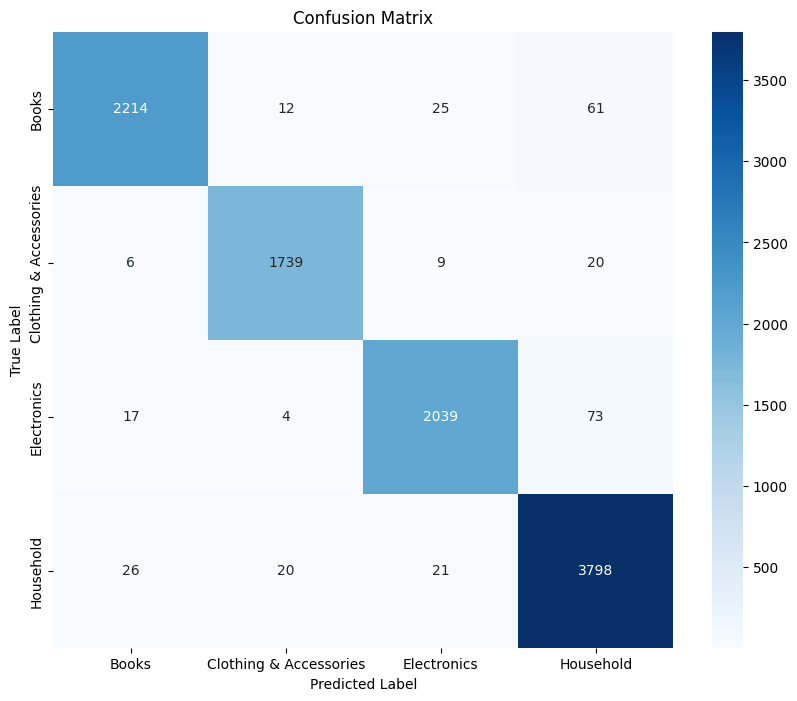

In [30]:
# Compute confusion matrix
cm = confusion_matrix(targets_labels, preds_labels)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=learn.dls.vocab[1], 
            yticklabels=learn.dls.vocab[1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Model 2: LinearSVC

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [32]:
df.head(2)

item_description  \
0  Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing te...   
1                                                                                                                                                                                                                                                               SAF 'Floral' Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297) Painting made up in synthetic frame with UV textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch (A perfect gift for your special ones).   

      labels  description_length  
0  Household                 228  
1  Household                  59

In [33]:
# Split the data into features (item_description) and labels
X = df['item_description']
y = df['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

In [35]:
# Initialize the LinearSVC classifier
classifier = LinearSVC()

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

LinearSVC()

In [36]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

                        precision    recall  f1-score   support

                 Books       0.99      0.98      0.98      2378
Clothing & Accessories       0.99      0.99      0.99      1750
           Electronics       0.97      0.98      0.97      2082
             Household       0.98      0.99      0.98      3875

              accuracy                           0.98     10085
             macro avg       0.98      0.98      0.98     10085
          weighted avg       0.98      0.98      0.98     10085



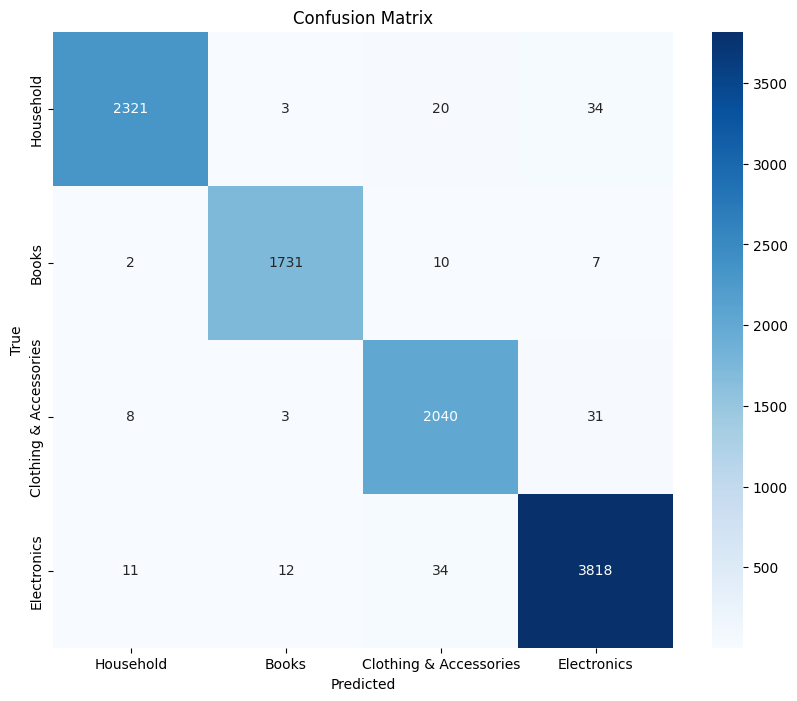

In [37]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
class_labels = df['labels'].unique()

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [30]:
"""
    on df_cleaned
        - want to see how model performs after outliers removed
"""

# Split the data into features (item_description) and labels
X = df_cleaned['item_description']
y = df_cleaned['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)


# Initialize the LinearSVC classifier
classifier = LinearSVC()

# Train the classifier
classifier.fit(X_train_tfidf, y_train)


# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

KeyError: 'item_description'

# Model 3: MultinomialNB

In [38]:
# Initialize the MultinomialNB classifier
"""
Model Parameters:
    'alpha=' controls smoothing:
      - Smoothing helps to handle cases where a particular feature or word has not occurred in the training data for a specific class. 
      - smaller values = less smoothing
      - default is 1

"""
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [39]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

                        precision    recall  f1-score   support

                 Books       0.97      0.92      0.94      2378
Clothing & Accessories       0.98      0.93      0.95      1750
           Electronics       0.96      0.90      0.93      2082
             Household       0.89      0.98      0.93      3875

              accuracy                           0.94     10085
             macro avg       0.95      0.93      0.94     10085
          weighted avg       0.94      0.94      0.94     10085



# Model 4: RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [41]:
# Initialize the Random Forest classifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [42]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

                        precision    recall  f1-score   support

                 Books       0.98      0.97      0.98      2378
Clothing & Accessories       0.98      0.97      0.98      1750
           Electronics       0.98      0.95      0.96      2082
             Household       0.96      0.98      0.97      3875

              accuracy                           0.97     10085
             macro avg       0.97      0.97      0.97     10085
          weighted avg       0.97      0.97      0.97     10085



# Model 5: MLPClassifier (a Neural Net)

In [43]:
from sklearn.neural_network import MLPClassifier

"""
    Multi-Layer Perceptron Classifier --> a feed forward Neural Network model
        - 1 or more hidden layers of artificial neurons (aka perceptrons)
        - each neuron in the layer uses a non-linear activiation function to process its inputs and produce an output
        - the outputs from the neurons in one layer serve as inputs to the neurons in the next layer
        - final layer (aka output layer) produces the classification results
        - supports both binary and multiclass classifiaction
"""

# Create an instance of MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


                        precision    recall  f1-score   support

                 Books       0.96      0.95      0.96      2378
Clothing & Accessories       0.97      0.97      0.97      1750
           Electronics       0.95      0.95      0.95      2082
             Household       0.96      0.97      0.96      3875

              accuracy                           0.96     10085
             macro avg       0.96      0.96      0.96     10085
          weighted avg       0.96      0.96      0.96     10085



# Pipeline w/ GridSearchCV

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the data into features (item_description) and labels
X = df['item_description']
y = df['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', None)  # Placeholder for the classifier
])

# Define the parameter grid for each model
param_grid = [
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.1, 1.0, 10.0]
    },
    {
        'classifier': [LinearSVC()],
        'classifier__C': [0.1, 1.0, 10.0]
    },
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.1, 1.0, 10.0]
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10]
    }
]

# Perform grid search using cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and its performance on the test set
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

# Get the best hyperparameters for each model
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

KeyboardInterrupt: 

# OLD

In [ ]:
# dls_lm = DataBlock(blocks=(TextBlock.from_df('item_description'), CategoryBlock),
#                  get_x=ColReader('text'),
#                  get_y=ColReader('labels'),
#                  splitter=RandomSplitter(0.2)).dataloaders(df, batch_size=128, seq_len=80)

In [ ]:
"""
    Now that our data is ready, fine-tune the pretrained language model
        - use embeddings to convert the integer word indices into activations that we can use for our NN
        - feed these embeddings into a RNN, 'AWD_LSTM'
            - ch.12 write model like this from scratch
"""

learn = language_model_learner(dls_lm, 
                               AWD_LSTM, 
                               drop_mult=0.3,
                               metrics=[accuracy, Perplexity()]).to_fp16()
#       text_classifier_learner() instead of language_model_learner()

In [ ]:
model.lr_find()

In [ ]:
learn.fit_one_cycle(1, lr_max=2e-2)

In [ ]:
model.validate()

In [ ]:
predictions = model.predict("hp computer hp9100")


In [ ]:
predictions

In [ ]:
# dataset = dls.train_ds
# tokenized_seq = dataset.items[0]
# sequence_lengths = tokenized_seq.map(len)

In [ ]:
"""
    Once I apply my two transformations (one for x, one for y)
        - this tokenizes and numericalizes
    I need to uses Datasets to apply the two pipelines in parallel to the same raw object and build a tuple with the result. 
        - this again automatically does .setup() for us
"""

# x_tfms = [Tokenizer.from_df('item_description'), Numericalize]
# y_tfms = [ColReader('labels'), Categorize()]
# splits = RandomSplitter(valid_pct=0.2)(range_of(df))
# dsets = Datasets(df, [x_tfms, y_tfms], splits=splits)
# x,y = dsets[0]
# x,y

# Define the transformations for x and y
x_tfms = [Tokenizer.from_df('item_description'), Numericalize]
y_tfms = [ColReader('labels'), Categorize()]

# Define the data splits
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

# Create the Datasets object
dsets = Datasets(df, tfms=[[x_tfms, y_tfms]], splits=splits)

# Retrieve an example from the Datasets
x, y = dsets[0]


In [ ]:
# Define the transformations for x and y
x_tfms = [Tokenizer.from_df('item_description'), Numericalize]
y_tfms = [ColReader('labels'), Categorize()]

# Define the data splits
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

# Create the Datasets object
dsets = Datasets(df, [x_tfms, y_tfms], splits=splits)

# Retrieve an example from the Datasets
x, y = dsets[0]

In [ ]:
"""
    Once I have my data transformed into a tuple using datasets, we need to convert the datasets object to a DataLoaders
        - padding happens before we batch the elements
"""

dls = dsets.dataloaders(bs=64, before_batch=pad_input)

# Lesson 4 - Transformers Text Classification -- Failed on Training

In [ ]:
from datasets import Dataset,DatasetDict

ds = Dataset.from_pandas(df)
ds

In [ ]:
model_nm = 'microsoft/deberta-v3-small'

In [ ]:
"""
    Lesson 4 - 44.20min mark:
    
    documents w/ > 2,000 words, use ULMFIT
                 < 2,000 words, can you use transformers
"""

from transformers import AutoModelForSequenceClassification,AutoTokenizer
tokz = AutoTokenizer.from_pretrained(model_nm)

In [ ]:
def tok_func(x): 
    return tokz(x["item_description"])

In [ ]:
ds[0]

In [ ]:
# tokenize 
## automatically creates 'input_ids' and other cols from the vocab in the tokenizer
### unique int for every possible token string
tok_ds = ds.map(tok_func, batched=True)

In [ ]:
row = tok_ds[0]
row['labels']
#row['item_description'], row['input_ids']

In [ ]:
tokz.vocab['paper']

In [ ]:
# Transformers ALWAYS assumes that our target col is called 'labels', so rename here
tok_ds = tok_ds.rename_columns({'target':'labels'})

In [ ]:
tok_ds = [tokz(label)['input_ids'] for label in tok_ds['labels']]
tok_ds

In [ ]:
tok_ds

In [ ]:
# Train Test Split
## 25% to validation set
## 75% to training set
dds = tok_ds.train_test_split(0.25, seed=42)
dds

In [ ]:
# Train Model
from transformers import TrainingArguments,Trainer
bs = 128
epochs = 4
# start with low lr and then keep doubling it to test
lr = 8e-5

In [ ]:
args = TrainingArguments('outputs', 
                         learning_rate=lr, 
                         warmup_ratio=0.1,
                         lr_scheduler_type='cosine', 
                         fp16=True,
                         evaluation_strategy="epoch", 
                         per_device_train_batch_size=bs,
                         per_device_eval_batch_size=bs*2,
                         num_train_epochs=epochs, 
                         weight_decay=0.01, 
                         report_to='none'
                        )

In [ ]:
from sklearn.metrics import accuracy_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred.predictions, eval_pred.label_ids
    predictions = np.argmax(logits, axis=1)
    return {"accuracy": accuracy_score(labels, predictions)}

In [ ]:
dds['train']['labels']

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=1)
trainer = Trainer(model, 
                  args,
                  train_dataset=dds['train'], 
                  eval_dataset=dds['test'],
                  tokenizer=tokz,
                  compute_metrics=compute_metrics)

In [ ]:
trainer.train()

In [ ]:
preds = trainer.predict(eval_ds).predictions.astype(float)
preds

In [ ]:
preds = np.clip(preds, 0, 1)

In [ ]:
preds